David Giacobbi  
Class: CPSC 222, Spring 2022  
Data Assignment #5  
3/28/22

# Exploratory Data Analysis: Rehabilitation Patient Data

The data analyzed below examines various attibutes of rehabilitation patients. Though each attribute is inherently different, they can provide important insights on the development and recovery of these patients. Reasons why we want to analyze this data might include:

* How gender and age affects patient numbers
* How marital status affects patients
* Which impairment groups are most common

The dataset used in this analysis is a part of this [GitHub Repo](https://github.com/GonzagaCPSC222/DAs/blob/master/files). It is found in the patient_data_to_clean.csv.

## Load the Data

Before the data can be cleaned and analyzed, we must load the data into a format that can be worked with in a Python-based environment. For this analysis, we will be using Pandas to load the `"patient_data_to_clean.csv"` data in a `pd.DataFrame`. The index column will be the patient ID uniquely given to each instance.

In [69]:
import pandas as pd

patient_df = pd.read_csv("patient_data_to_clean.csv", index_col="ID")
print(patient_df.head(5))

   Gender  Age Marital Status  RIC  Admission FIM Score  Discharge FIM Score
ID                                                                          
0       M   80        Widowed    8                   40                   89
1       M   90       Divorced    1                   65                   75
2       M   53        Married    2                   67                   99
3       F   69        Married   15                   41                   67
4       F   80        Married    3                   66                   65


### Data Attributes
Now that the data has successfully loaded into a Pandas DataFrame, each attibute can be easily identified:

* **ID**: unique identifier for each patient; used as index (int)
* **Gender**: "F" for female, "M" for male (char)
* **Age**: how old the patient is in years (int)
* **Marital Status**: short description of the patient's marital status (string)
* **RIC**: assigned code for particular impairment group the patient belongs to; see Appendix B of the [IRF-PAI Training Manual](https://www.cms.gov/medicare/medicare-fee-for-service-payment/inpatientrehabfacpps/downloads/irfpai-manual-2012.pdf) for more information (int)
* **Admission FIM Score**: total Functional Independence Measure score when admitted (int)
* **Discharge FIM Score**: total Functional Independence Measure score when discharged (int)

*The FIM exam given to patients evaluates the amount of help required by the patient when completing motor or congnitive tasks. Each task has a value of up to 7 points, measuring independence from any assistance needed on the task. Section III of the [IRF-PAI Training Manual](https://www.cms.gov/medicare/medicare-fee-for-service-payment/inpatientrehabfacpps/downloads/irfpai-manual-2012.pdf) provides a more in-depth description.*

## Clean the Data

Before any analysis can take place, it is important that the dataset is cleaned of any values that could create a misleading and false conclusion. Most of the attributes in this dataset are already cleaned and ready; however, there are two important ones that still require cleaning:

* Marital Status
* RIC Codes

### Marital Status

As of right now, there are too many different spellings and descriptions for the marital status of different patients. This is because the dataset used a free response format when collecting patient marital status. Though the majority of the responses are valid values, they need to be better categorized and the other cases must be assigned an <NaN> value. The new categories will be:

* Never married
* Divorced
* Married
* Widowed
* Separated

In [70]:
import numpy as np

marital_ser = patient_df["Marital Status"].copy()

for i in range(len(marital_ser)):

    curr_status = str(marital_ser.iloc[i])
    curr_status = curr_status.lower()

    if "never married" in curr_status or "single" in curr_status:
        marital_ser.iloc[i] = "Never married"
    elif "divorced" in curr_status:
        marital_ser.iloc[i] = "Divorced"
    elif "married" in curr_status:
        marital_ser.iloc[i] = "Married"
    elif "widowed" in curr_status or "widow" in curr_status:
        marital_ser.iloc[i] = "Widowed"
    elif "separated" in curr_status:
        marital_ser.iloc[i] = "Separated"
    else:
        marital_ser.iloc[i] = np.NaN

    patient_df["Marital Status"] = marital_ser

print("Null value count:", patient_df["Marital Status"].isnull().sum())
print(patient_df["Marital Status"].value_counts())

Null value count: 43
Married          2254
Widowed          1041
Never married     600
Divorced          585
Separated          32
Name: Marital Status, dtype: int64


After cleaning it is helpful to print out the value counts to make sure that every instance is accounted for. Here, a quick calculation reveals that these values total up to the number of patients in the dataset. Note: the null value counts are most likely attributed to any spelling errors in strings or phrases that do not accurately correspond with one of the groups above.

### RIC Codes

The dataset right now only provides the corresponding numeric code for the patient's impairment group. From an analysis standpoint, this is not helpful unless the code is general knowledge. To clean this column, a dictionary will be used to map each numeric code with an abbreviated string of the impairment group which can be interpreted easier.

In [71]:
ric_decoder = {1: "Stroke", 2: "TBI", 3: "NTBI", 
               4: "TSCI", 5: "NTSCI", 6: "Neuro", 
               7: "FracLE", 8: "ReplLE", 9: "Ortho", 
               10: "AMPLE", 11: "AMP-NLE", 12: "OsteoA", 
               13: "RheumA", 14: "Cardiac", 15: "Pulmonary", 
               16: "Pain", 17: "MMT-NBSCI", 18: "MMT-BSCI", 
               19: "GB", 20: "Misc", 21: "Burns"}

ric_ser = patient_df["RIC"]

for id in ric_decoder:
    ric_ser.replace(id, ric_decoder[id], inplace=True)

print(patient_df["RIC"].head(10))

ID
0       ReplLE
1       Stroke
2          TBI
3    Pulmonary
4         NTBI
5       FracLE
6         NTBI
7        AMPLE
8    Pulmonary
9        NTSCI
Name: RIC, dtype: object


Now that the patient dataframe has been cleaned and checked for any missing values, the data is now ready to be aggregated and visualize. All that is left is to write the cleaned dataframe to a new csv file called: `"patient_data_cleaned.csv"`

In [72]:
patient_df.to_csv("patient_data_cleaned.csv")

## Aggregate the Data

Before visualization can be done, the next step is to extract the data to be visualized and store it in a Pandas `Series`. The following series will hold:

1. total patient numbers
2. total male patients
3. total female patients
4. total married patients
5. RIC label of the most common RIC
6. number of patients with most common RIC
7. average age of stroke
8. standard deviation of stroke patients
9. average age of male stroke patients
10. standard deviation of age of male stroke patients
11. average age of female stroke patients
12. standard deviation of age of female stroke patients

In [73]:
patients_total = patient_df.shape[0]

males_total = patient_df["Gender"].value_counts()["M"]

females_total = patient_df["Gender"].value_counts()["F"]

married_total = patient_df["Marital Status"].value_counts()["Married"]

# https://datascienceparichay.com/article/most-frequent-value-in-a-pandas-column/
# source used for .idxmax() function
most_common_RIC = patient_df["RIC"].value_counts().idxmax()

most_common_RIC_total = patient_df["RIC"].value_counts().max()

aggregate_ser = pd.Series([patients_total, males_total, females_total, married_total, most_common_RIC, most_common_RIC_total],
                          index=["Patient Total", "Male Patient Total", "Female Patient Total", "Married Total", "Most Common RIC", "Most Common RIC Total"])

print(aggregate_ser)

Patient Total              4555
Male Patient Total         2242
Female Patient Total       2313
Married Total              2254
Most Common RIC          Stroke
Most Common RIC Total      1169
dtype: object


From the data aggregation above, there is already some telling information about patient impairment groups. Even though gender has a near even split, stroke appears to be the most common impairment group by far. Contributing to about 25% of all patients, strokes are the most common. Let's dive into a deeper analysis of the stroke group by aggregating some more data about the ages and genders of stroke patients.

To get a couple of points for analysis, both the average and the standard deviation will be taken of the ages of different stroke patient groups. Standard deviation is a measurment of how much variation occurs in a dataset. It requires the following variables:

* $x_i$ = each instance in the dataset
* $N$ = the total population being measured
* $\mu$ = the mean of the population
* $\sigma$ = standard deviation

Combining these variables together, the following formula is created:

$$\sigma = \sqrt{\frac{\sum(x_i - \mu)}{N}}$$

In [74]:
import math

stroke_patient_total = patient_df["RIC"].value_counts()["Stroke"]
stroke_age_total = 0
for i in range(len(patient_df["RIC"])):
    if patient_df.loc[i]["RIC"] == "Stroke":
        stroke_age_total += patient_df.loc[i]["Age"]

stroke_age_avg = round((stroke_age_total / stroke_patient_total), 2)

sum_of_sq_difference = 0
for i in range(len(patient_df["Age"])):
    sum_of_sq_difference += math.pow(patient_df.loc[i]["Age"] - stroke_age_avg, 2)

stroke_age_std = math.sqrt(sum_of_sq_difference / stroke_patient_total)
stroke_age_std = round(stroke_age_std, 2)


male_stroke_patient_total  = 0
male_stroke_age_total = 0
for i in range(len(patient_df["RIC"])):
    if patient_df.loc[i]["RIC"] == "Stroke" and patient_df.loc[i]["Gender"] == "M":
        male_stroke_age_total += patient_df.loc[i]["Age"]
        male_stroke_patient_total += 1

stroke_age_male_avg = round((male_stroke_age_total / male_stroke_patient_total), 2)

sum_of_male_sq_difference = 0
for i in range(len(patient_df["Age"])):
    if patient_df.loc[i]["Gender"] == "M":
        sum_of_male_sq_difference += math.pow(patient_df.loc[i]["Age"] - stroke_age_male_avg, 2)

stroke_age_male_std = math.sqrt(sum_of_male_sq_difference / male_stroke_patient_total)
stroke_age_male_std = round(stroke_age_male_std, 2)

female_stroke_patient_total  = 0
female_stroke_age_total = 0
for i in range(len(patient_df["RIC"])):
    if patient_df.loc[i]["RIC"] == "Stroke" and patient_df.loc[i]["Gender"] == "F":
        female_stroke_age_total += patient_df.loc[i]["Age"]
        female_stroke_patient_total += 1

stroke_age_female_avg = round((female_stroke_age_total / female_stroke_patient_total), 2)

sum_of_female_sq_difference = 0
for i in range(len(patient_df["Age"])):
    if patient_df.loc[i]["Gender"] == "F":
        sum_of_female_sq_difference += math.pow(patient_df.loc[i]["Age"] - stroke_age_female_avg, 2)

stroke_age_female_std = math.sqrt(sum_of_female_sq_difference / female_stroke_patient_total)
stroke_age_female_std = round(stroke_age_female_std, 2)

stroke_ser = pd.Series([stroke_age_avg, stroke_age_std, stroke_age_male_avg, stroke_age_male_std, stroke_age_female_avg, stroke_age_female_std],
                        index=["Stroke Age Average", "Stroke Age Standard Deviation", "Stroke Age Male Average", "Stroke Age Male Standard Deviation", 
                               "Stroke Age Female Average", "Stroke Age Female Standard Deviation"])

aggregate_ser = aggregate_ser.append(stroke_ser)
print(aggregate_ser)

Patient Total                             4555
Male Patient Total                        2242
Female Patient Total                      2313
Married Total                             2254
Most Common RIC                         Stroke
Most Common RIC Total                     1169
Stroke Age Average                       71.29
Stroke Age Standard Deviation            32.48
Stroke Age Male Average                  70.08
Stroke Age Male Standard Deviation       32.72
Stroke Age Female Average                 72.6
Stroke Age Female Standard Deviation     31.84
dtype: object


From the new stroke data that was aggregated, it is interesting to see that although the average stroke age is in the same relative area for both males and females, it appears that males have a slightly lower average than females. Additionally, compared to females, males have more variation in the ages of patients that experience strokes. These inferences can be made; however, these numbers do not paint the whole picture. In order to better understand this, data visualization is required.

## Visualize the Data

To best display the patient dataset, there are two types of graphs to analyze each RIC with enough data:

* Histograms
* Scatter Plots

These graphs should provide some better insights on some of the RIC trends, and they could lead to potential inferences for further analysis in the future.

### Histograms

The histograms will include include the following details for each RIC group

* X-Axis: Age of patients in the RIC group
* Y-Axis: amount of patients at that age
* Mean and Standard Deviation of ages in title

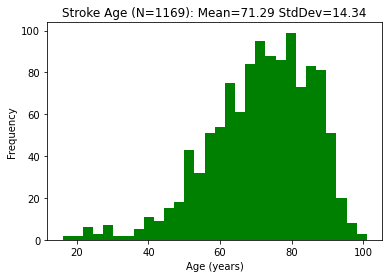

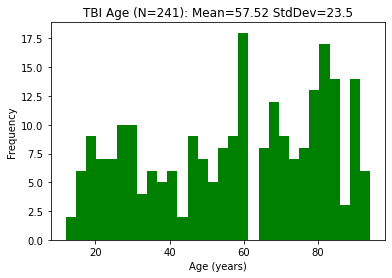

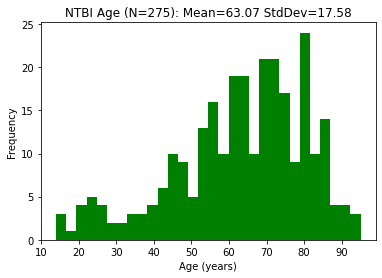

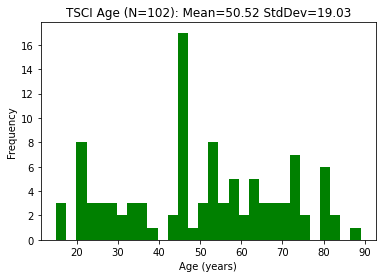

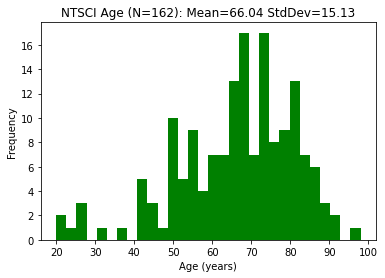

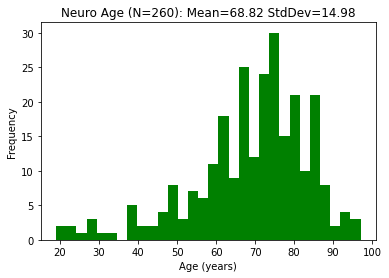

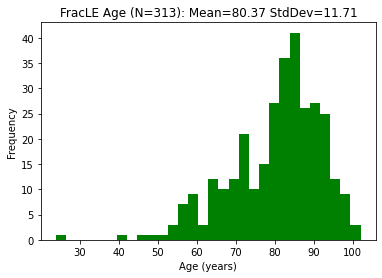

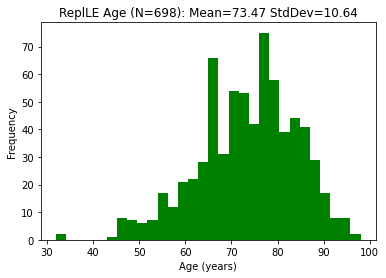

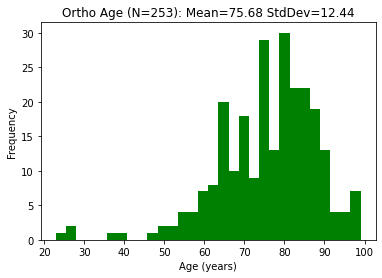

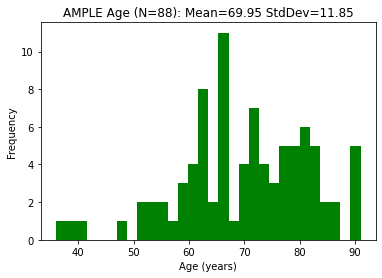

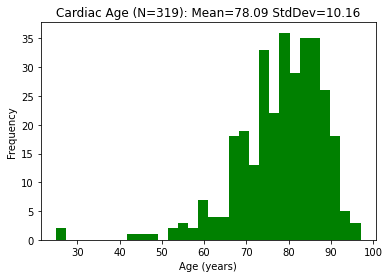

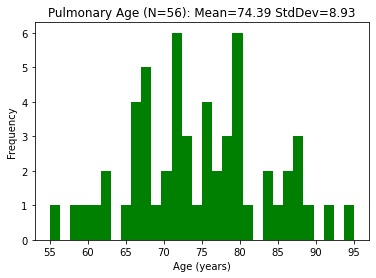

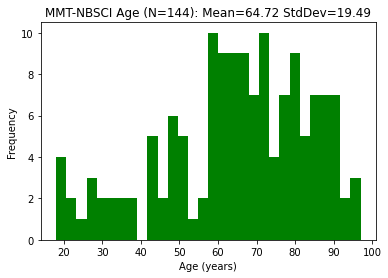

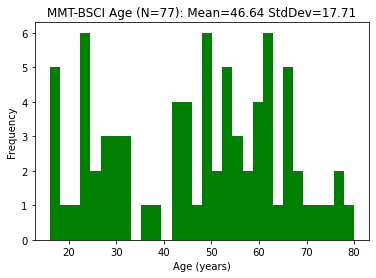

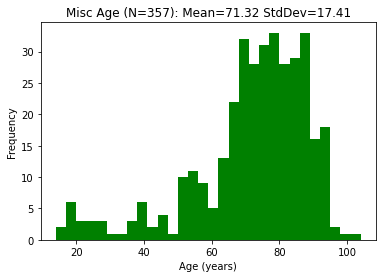

In [75]:
import matplotlib.pyplot as plt

ric_codes = ["Stroke", "TBI", "NTBI", 
             "TSCI", "NTSCI", "Neuro", 
             "FracLE", "ReplLE", "Ortho", 
             "AMPLE", "AMP-NLE", "OsteoA", 
             "RheumA", "Cardiac", "Pulmonary", 
             "Pain", "MMT-NBSCI", "MMT-BSCI", 
             "GB", "Misc", "Burns"]

for ric_id in ric_codes:

    # Source for .loc to get dataframe of only that specific RIC group
    # https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
    ric_df = patient_df.loc[patient_df["RIC"] == ric_id]
    age_ser = ric_df["Age"]

    n_total = len(age_ser)

    if n_total > 50:

        plt.figure()
        plt.xlabel("Age (years)")
        plt.ylabel("Frequency")
        plt.hist(age_ser, bins=30, color="green")
        plt.title(ric_id + " Age (N=" + str(n_total) + "): Mean=" + str(round(age_ser.mean(), 2)) + " StdDev=" + str(round(age_ser.std(), 2)))
        plt.show()

The graphs above took all of the RIC codes with more than 50 data inputs and plotted the frequency of each age in that group. RIC groups with lower than 50 patients were not plotted as it would not be enough to accurately depict a distribution from this dataset.

This data provides some telling insights about a couple of the RIC groups. It appears that majority of them follow the outline of a normal distribution curve. However, the spread of this distribution varies depending on the RIC. Additionally, there are a couple RIC groups that do not even have a normal distribution. Instead the data is dispersed over all ages and at all frequencies. A deeper look into these RIC groups could explain why this impairment can be found at any moment in a patient's life.

### Scatter Plots

Now that the histograms have been completed, scatter plots will be created next. For each RIC group being analyzed in these graphs, the following data will be included:

* X-Axis: Admission FIM Score
* Y-Axis: Discharge FIM Score
* Plots will be marked by gender
* No change line will show if improvement was made

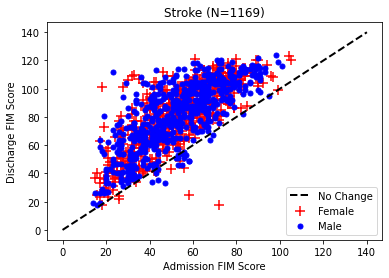

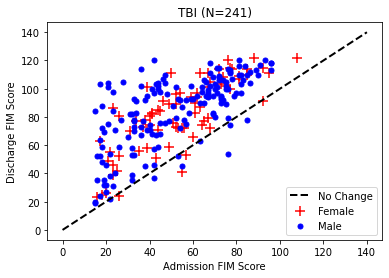

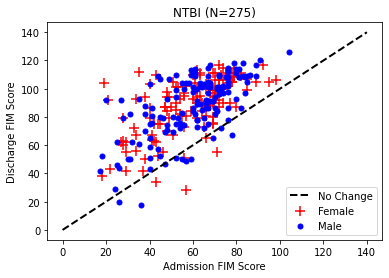

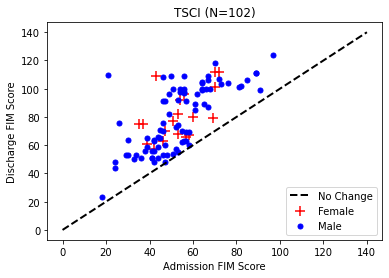

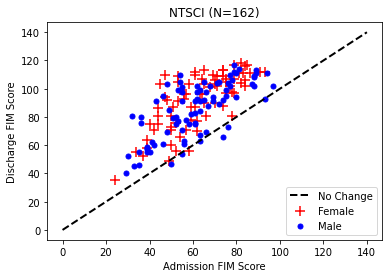

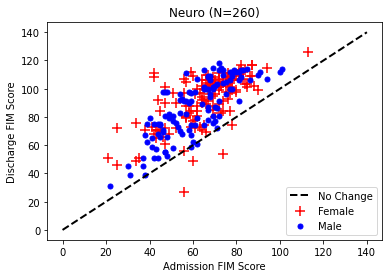

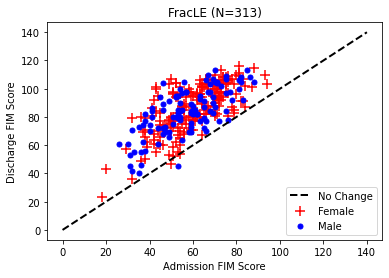

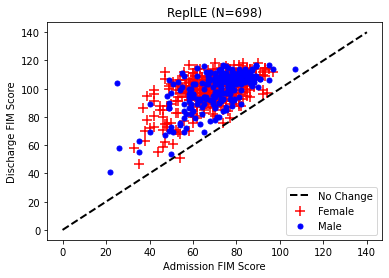

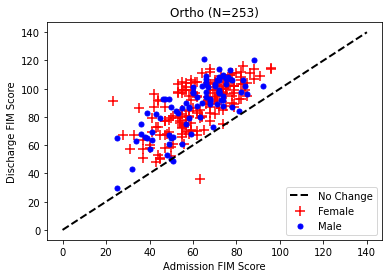

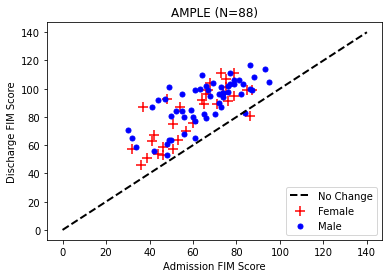

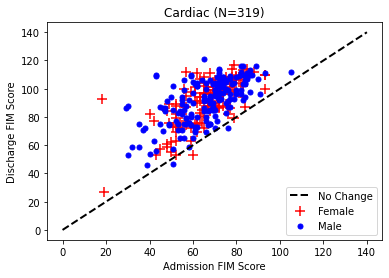

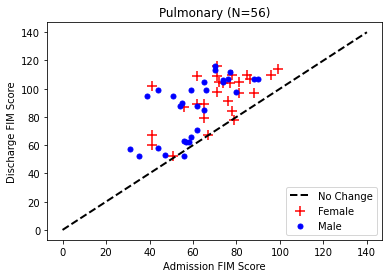

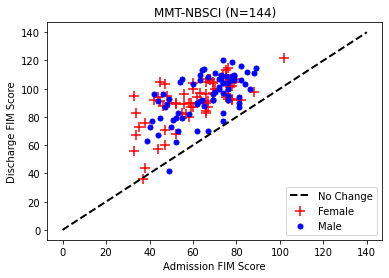

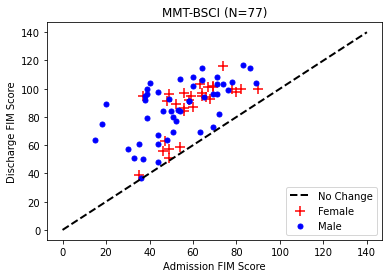

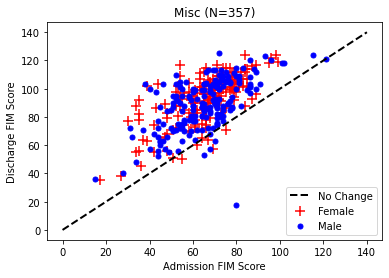

In [76]:
ric_codes = ["Stroke", "TBI", "NTBI", 
             "TSCI", "NTSCI", "Neuro", 
             "FracLE", "ReplLE", "Ortho", 
             "AMPLE", "AMP-NLE", "OsteoA", 
             "RheumA", "Cardiac", "Pulmonary", 
             "Pain", "MMT-NBSCI", "MMT-BSCI", 
             "GB", "Misc", "Burns"]

# Source for .loc to get dataframe of only that specific RIC group
# https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
male_df = patient_df.loc[patient_df["Gender"] == "M"]
female_df = patient_df.loc[patient_df["Gender"] == "F"]

for ric_id in ric_codes:

    ric_male_df = male_df.loc[male_df["RIC"] == ric_id]
    male_admission_ser = ric_male_df["Admission FIM Score"].copy()
    male_discharge_ser = ric_male_df["Discharge FIM Score"].copy()

    ric_female_df = female_df.loc[female_df["RIC"] == ric_id]
    female_admission_ser = ric_female_df["Admission FIM Score"].copy()
    female_discharge_ser = ric_female_df["Discharge FIM Score"].copy()

    n_total = len(male_admission_ser) + len(female_admission_ser)

    if n_total > 50:
        plt.figure()
        plt.scatter(female_admission_ser, female_discharge_ser, s=100, c="red", marker="+", label="Female")
        plt.scatter(male_admission_ser, male_discharge_ser, s=100, c="blue", marker=".", label="Male")
        plt.plot([0,140], [0, 140], c="black", ls="--", lw=2, label="No Change")
        plt.legend(loc=4)
        plt.title(ric_id + " (N=" + str(n_total) + ")")
        plt.xlabel("Admission FIM Score")
        plt.ylabel("Discharge FIM Score")
        plt.show()

These scatter plots provide some support to the effectiveness of patient development over time. When patients come to receive treatment, no matter what RIC group they are a part of or what gender, there is an overall improvement in their daily motor and cognitive skills. This data can hold a quite compelling point to anyone who is a part of one of these RIC groups and is thinking about medical treatment. There is a clear improvement in every category, which can provide some light for those who may be suffering from one of these impairments.